# COVID break and EPL
This project aims to analyse and visualise the effects of COVID-19 break during the 2019-2020 season and an English Premier League (EPL) club **Burnley F.C.** (mid-table team).

During the course of this project I attempted to execute the following steps to the best of my ability.
* Select a real world data.
* Data Preparation and cleaning.
* Perform exploratory data analysis and visualisation using Matplotlib and seaborn.
* Ask and answer questions about data.
* Summarise inferences and come to a conclusion.


## STEP 1 : Select a real world data.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
football_uncleaned_df=pd.read_csv('E0.csv')

In [3]:
football_uncleaned_df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,2.03,0.50,1.89,2.01,1.88,2.05,1.94,2.05,1.86,2.02
376,E0,26/07/2020,16:00,Man City,Norwich,5,0,H,2,0,...,5.77,-3.75,2.03,1.87,2.01,1.88,2.06,1.88,2.02,1.84
377,E0,26/07/2020,16:00,Newcastle,Liverpool,1,3,A,1,1,...,2.40,1.00,1.94,1.96,1.95,1.97,2.03,2.00,1.95,1.92
378,E0,26/07/2020,16:00,Southampton,Sheffield United,3,1,H,0,1,...,2.01,-0.50,1.97,1.93,2.00,1.93,2.03,1.96,1.98,1.89


## STEP 2 : Data preparation and cleaning.

In [4]:
football_df=football_uncleaned_df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','HTR','FTR','Referee']]

In [5]:
football_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee
0,09/08/2019,Liverpool,Norwich,4,1,4,0,H,H,M Oliver
1,10/08/2019,West Ham,Man City,0,5,0,1,A,A,M Dean
2,10/08/2019,Bournemouth,Sheffield United,1,1,0,0,D,D,K Friend
3,10/08/2019,Burnley,Southampton,3,0,0,0,D,H,G Scott
4,10/08/2019,Crystal Palace,Everton,0,0,0,0,D,D,J Moss
...,...,...,...,...,...,...,...,...,...,...
375,26/07/2020,Leicester,Man United,0,2,0,0,D,A,M Atkinson
376,26/07/2020,Man City,Norwich,5,0,2,0,H,H,C Pawson
377,26/07/2020,Newcastle,Liverpool,1,3,1,1,D,A,A Taylor
378,26/07/2020,Southampton,Sheffield United,3,1,0,1,A,H,P Bankes


In [6]:
# 09-03-2020 last match before lockdown
football_df.Date=pd.to_datetime(football_df.Date, format="%d/%m/%Y")
football_df['month']=pd.DatetimeIndex(football_df.Date).month
football_df['Day_num']=pd.DatetimeIndex(football_df.Date).day

In [7]:
flag1 = pd.Series(np.where(football_df.Date < np.datetime64('2020-03-09'), True, False), index=football_df.index)
football_df[flag1]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee,month,Day_num
0,2019-08-09,Liverpool,Norwich,4,1,4,0,H,H,M Oliver,8,9
1,2019-08-10,West Ham,Man City,0,5,0,1,A,A,M Dean,8,10
2,2019-08-10,Bournemouth,Sheffield United,1,1,0,0,D,D,K Friend,8,10
3,2019-08-10,Burnley,Southampton,3,0,0,0,D,H,G Scott,8,10
4,2019-08-10,Crystal Palace,Everton,0,0,0,0,D,D,J Moss,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...
282,2020-03-07,Southampton,Newcastle,0,1,0,0,D,A,G Scott,3,7
283,2020-03-07,Wolves,Brighton,0,0,0,0,D,D,A Marriner,3,7
284,2020-03-07,Burnley,Tottenham,1,1,1,0,H,D,J Moss,3,7
285,2020-03-08,Chelsea,Everton,4,0,2,0,H,H,K Friend,3,8


In [8]:
flag2 = pd.Series(np.where(football_df.Date > np.datetime64('2020-03-09'), True, False), index=football_df.index)
football_df[flag2]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee,month,Day_num
288,2020-06-17,Aston Villa,Sheffield United,0,0,0,0,D,D,M Oliver,6,17
289,2020-06-17,Man City,Arsenal,3,0,1,0,H,H,A Taylor,6,17
290,2020-06-19,Norwich,Southampton,0,3,0,0,D,A,K Friend,6,19
291,2020-06-19,Tottenham,Man United,1,1,1,0,H,D,J Moss,6,19
292,2020-06-20,Watford,Leicester,1,1,0,0,D,D,C Pawson,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...
375,2020-07-26,Leicester,Man United,0,2,0,0,D,A,M Atkinson,7,26
376,2020-07-26,Man City,Norwich,5,0,2,0,H,H,C Pawson,7,26
377,2020-07-26,Newcastle,Liverpool,1,3,1,1,D,A,A Taylor,7,26
378,2020-07-26,Southampton,Sheffield United,3,1,0,1,A,H,P Bankes,7,26


In [9]:
team='Burnley'

In [10]:
team_df=football_df[(football_df.HomeTeam==team)|(football_df.AwayTeam==team)]
team_df['Team']=team
team_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee,month,Day_num,Team
3,2019-08-10,Burnley,Southampton,3,0,0,0,D,H,G Scott,8,10,Burnley
10,2019-08-17,Arsenal,Burnley,2,1,1,1,D,H,M Dean,8,17,Burnley
29,2019-08-25,Wolves,Burnley,1,1,0,1,A,D,C Pawson,8,25,Burnley
37,2019-08-31,Burnley,Liverpool,0,3,0,2,A,A,C Kavanagh,8,31,Burnley
41,2019-09-14,Brighton,Burnley,1,1,0,0,D,D,M Oliver,9,14,Burnley
52,2019-09-21,Burnley,Norwich,2,0,2,0,H,H,D Coote,9,21,Burnley
61,2019-09-28,Aston Villa,Burnley,2,2,1,0,H,D,L Mason,9,28,Burnley
71,2019-10-05,Burnley,Everton,1,0,0,0,D,H,G Scott,10,5,Burnley
84,2019-10-19,Leicester,Burnley,2,1,1,1,D,H,J Moss,10,19,Burnley
95,2019-10-26,Burnley,Chelsea,2,4,0,2,A,A,M Oliver,10,26,Burnley


In [11]:
team_df['GS']=0
team_df['GC']=0
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        team_df['GS'][i]=team_df['FTHG'][i]
        team_df['GC'][i]=team_df['FTAG'][i]
    else:
        team_df['GS'][i]=team_df['FTAG'][i]
        team_df['GC'][i]=team_df['FTHG'][i]

In [12]:
team_df['Result']='a'
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        if team_df['FTR'][i]=='H':
            team_df['Result'][i]='WIN'
        if team_df['FTR'][i]=='D':
            team_df['Result'][i]='DRAW'
        if team_df['FTR'][i]=='A':
            team_df['Result'][i]='LOSS'
    else:
        if team_df['FTR'][i]=='H':
            team_df['Result'][i]='LOSS'
        if team_df['FTR'][i]=='D':
            team_df['Result'][i]='DRAW'
        if team_df['FTR'][i]=='A':
            team_df['Result'][i]='WIN'

In [13]:
team_df['Opponent']='a'
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        team_df['Opponent'][i]=team_df['AwayTeam'][i]
    else:
        team_df['Opponent'][i]=team_df['HomeTeam'][i]

In [14]:
team_df['Fixture']='a'
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        team_df['Fixture'][i]='Home'
    else:
        team_df['Fixture'][i]='Away'

In [15]:
sns.set_style("darkgrid")

In [16]:
team_df=team_df.drop(['HTR','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','FTR','month','Day_num'],axis=1)

In [17]:
team_df=team_df[['Date','Team','Fixture','Opponent','GS','GC','Result','Referee']]

In [18]:
team_df

,Date,Team,Fixture,Opponent,GS,GC,Result,Referee
3,2019-08-10,Burnley,Home,Southampton,3,0,WIN,G Scott
10,2019-08-17,Burnley,Away,Arsenal,1,2,LOSS,M Dean
29,2019-08-25,Burnley,Away,Wolves,1,1,DRAW,C Pawson
37,2019-08-31,Burnley,Home,Liverpool,0,3,LOSS,C Kavanagh
41,2019-09-14,Burnley,Away,Brighton,1,1,DRAW,M Oliver
52,2019-09-21,Burnley,Home,Norwich,2,0,WIN,D Coote
61,2019-09-28,Burnley,Away,Aston Villa,2,2,DRAW,L Mason
71,2019-10-05,Burnley,Home,Everton,1,0,WIN,G Scott
84,2019-10-19,Burnley,Away,Leicester,1,2,LOSS,J Moss
95,2019-10-26,Burnley,Home,Chelsea,2,4,LOSS,M Oliver


In [19]:
team_df['Total_GS']=team_df.GS.cumsum()
team_df['Total_GC']=team_df.GC.cumsum()

In [20]:
team_df

,Date,Team,Fixture,Opponent,GS,GC,Result,Referee,Total_GS,Total_GC
3,2019-08-10,Burnley,Home,Southampton,3,0,WIN,G Scott,3,0
10,2019-08-17,Burnley,Away,Arsenal,1,2,LOSS,M Dean,4,2
29,2019-08-25,Burnley,Away,Wolves,1,1,DRAW,C Pawson,5,3
37,2019-08-31,Burnley,Home,Liverpool,0,3,LOSS,C Kavanagh,5,6
41,2019-09-14,Burnley,Away,Brighton,1,1,DRAW,M Oliver,6,7
52,2019-09-21,Burnley,Home,Norwich,2,0,WIN,D Coote,8,7
61,2019-09-28,Burnley,Away,Aston Villa,2,2,DRAW,L Mason,10,9
71,2019-10-05,Burnley,Home,Everton,1,0,WIN,G Scott,11,9
84,2019-10-19,Burnley,Away,Leicester,1,2,LOSS,J Moss,12,11
95,2019-10-26,Burnley,Home,Chelsea,2,4,LOSS,M Oliver,14,15


In [21]:
team_df['GD']=team_df.Total_GS-team_df.Total_GC

In [22]:
team_df

,Date,Team,Fixture,Opponent,GS,GC,Result,Referee,Total_GS,Total_GC,GD
3,2019-08-10,Burnley,Home,Southampton,3,0,WIN,G Scott,3,0,3
10,2019-08-17,Burnley,Away,Arsenal,1,2,LOSS,M Dean,4,2,2
29,2019-08-25,Burnley,Away,Wolves,1,1,DRAW,C Pawson,5,3,2
37,2019-08-31,Burnley,Home,Liverpool,0,3,LOSS,C Kavanagh,5,6,-1
41,2019-09-14,Burnley,Away,Brighton,1,1,DRAW,M Oliver,6,7,-1
52,2019-09-21,Burnley,Home,Norwich,2,0,WIN,D Coote,8,7,1
61,2019-09-28,Burnley,Away,Aston Villa,2,2,DRAW,L Mason,10,9,1
71,2019-10-05,Burnley,Home,Everton,1,0,WIN,G Scott,11,9,2
84,2019-10-19,Burnley,Away,Leicester,1,2,LOSS,J Moss,12,11,1
95,2019-10-26,Burnley,Home,Chelsea,2,4,LOSS,M Oliver,14,15,-1


## STEP 3 : Exploratory analysis.

In [23]:
team_df

,Date,Team,Fixture,Opponent,GS,GC,Result,Referee,Total_GS,Total_GC,GD
3,2019-08-10,Burnley,Home,Southampton,3,0,WIN,G Scott,3,0,3
10,2019-08-17,Burnley,Away,Arsenal,1,2,LOSS,M Dean,4,2,2
29,2019-08-25,Burnley,Away,Wolves,1,1,DRAW,C Pawson,5,3,2
37,2019-08-31,Burnley,Home,Liverpool,0,3,LOSS,C Kavanagh,5,6,-1
41,2019-09-14,Burnley,Away,Brighton,1,1,DRAW,M Oliver,6,7,-1
52,2019-09-21,Burnley,Home,Norwich,2,0,WIN,D Coote,8,7,1
61,2019-09-28,Burnley,Away,Aston Villa,2,2,DRAW,L Mason,10,9,1
71,2019-10-05,Burnley,Home,Everton,1,0,WIN,G Scott,11,9,2
84,2019-10-19,Burnley,Away,Leicester,1,2,LOSS,J Moss,12,11,1
95,2019-10-26,Burnley,Home,Chelsea,2,4,LOSS,M Oliver,14,15,-1


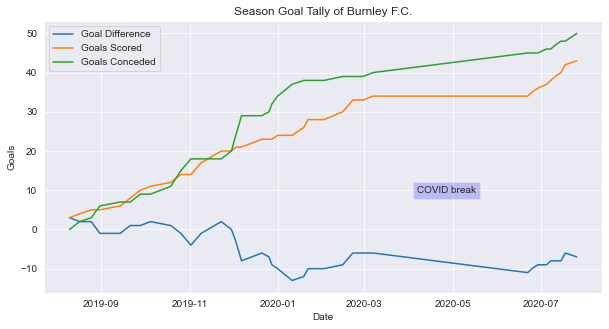

In [24]:
plt.figure(figsize=(10,5))
plt.plot(team_df.Date,team_df.GD)
plt.plot(team_df.Date,team_df.Total_GS)
plt.plot(team_df.Date,team_df.Total_GC)
plt.legend(['Goal Difference','Goals Scored','Goals Conceded'])
plt.title('Season Goal Tally of {} F.C.'.format(team))
plt.xlabel('Date')
plt.ylabel('Goals')
#plt.annotate("Start of break", xy=(np.datetime64("2020-03-08"),0), xytext=(np.datetime64("2020-03-08"),90), arrowprops=dict(facecolor='black'))
#plt.annotate("End of break", xy=(np.datetime64("2020-06-17"),0), xytext=(np.datetime64("2020-06-17"),90), arrowprops=dict(facecolor='black'))
plt.text(np.datetime64("2020-04-27"),10,'COVID break', horizontalalignment='center', verticalalignment='center', fontsize =10, bbox=dict(facecolor='blue', alpha=0.2));

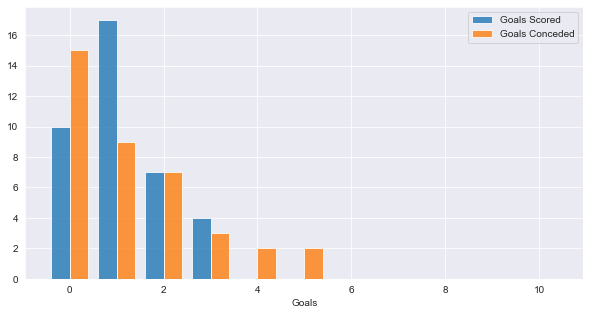

In [41]:
plt.figure(figsize=(10,5))
plt.hist([team_df.GS,team_df.GC],bins=np.arange(-0.5,11.5,1), alpha=0.8)
plt.xlabel("Goals")
plt.legend(['Goals Scored','Goals Conceded']);

In [26]:
print('In the 2019-20 PL season, {} F.C. scored a goal every {:.0f} minutes and conceded a goal every {:.0f} minutes.'.format(team,90/team_df.GS.mean(),90/team_df.GC.mean()))

In the 2019-20 PL season, Burnley F.C. scored a goal every 80 minutes and conceded a goal every 68 minutes.


In [27]:
print("Before COVID break, {} F.C. scored an average of {:.2f} goals per match but after the COVID break they scored an average of {:.2f} goals per match.".format(team,team_df[flag1].GS.mean(),team_df[flag2].GS.mean()))

Before COVID break, Burnley F.C. scored an average of 1.17 goals per match but after the COVID break they scored an average of 1.00 goals per match.


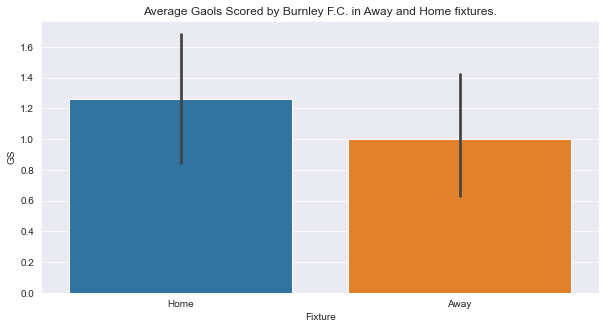

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(team_df.Fixture,team_df.GS)
plt.title("Average Gaols Scored by {} F.C. in Away and Home fixtures.".format(team));

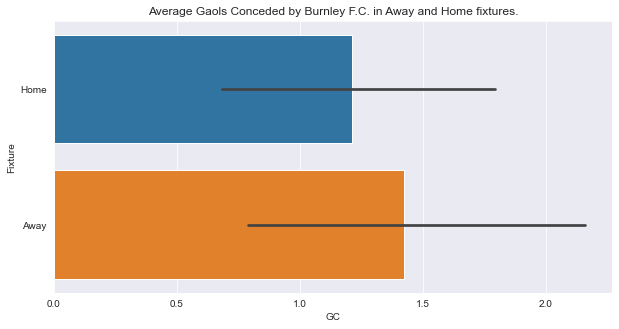

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(team_df.GC,team_df.Fixture)
plt.title("Average Gaols Conceded by {} F.C. in Away and Home fixtures.".format(team));

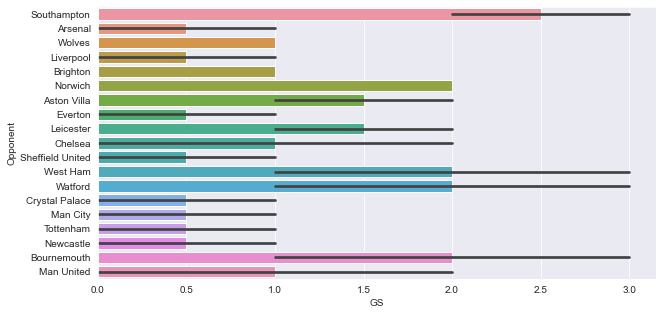

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(team_df.GS,team_df.Opponent);

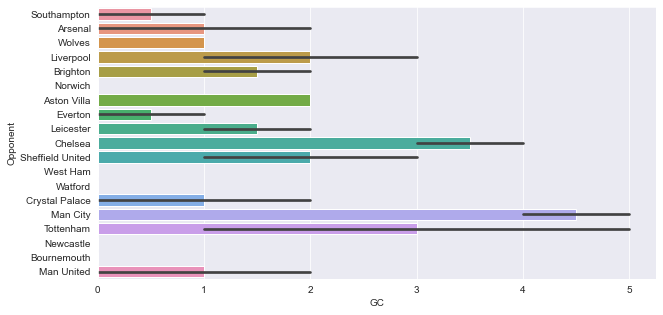

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(team_df.GC,team_df.Opponent);

## STEP 4 : Ask and answer questions about data.
* Which 5 teams scored most points after break?
* Which 5 teams had max difference in points per match before and after break?
* How were team's performances affected by without fans?
    * gs 
    * gc
    * points/macth

### Effects on Winning Rate

In [57]:
print("Overall-")
win_p_1=round(team_df[(team_df.Result=='WIN')].Team.count()/team_df.Team.count()*100,2)
print("{}'s overall Win Percentage: {} %".format(team,win_p_1))

print("\nBefore and After break:")
win_p_3=round(team_df[(flag2)&(team_df.Result=='WIN')].Team.count()/team_df[flag2].Team.count()*100,2)
win_p_2=round(team_df[(flag1)&(team_df.Result=='WIN')].Team.count()/team_df[flag1].Team.count()*100,2)
print("{}'s Win Percentage before COVID break: {} %".format(team,win_p_2))
print("{}'s Win Percentage after COVID break: {} %".format(team,win_p_3))

print("\nHome matches-")
win_p_5=round(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()/team_df[(flag2)&(team_df.Fixture=='Home')].Team.count()*100,2)
win_p_4=round(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()/team_df[(flag1)&(team_df.Fixture=='Home')].Team.count()*100,2)
print("{}'s Win Percentage in Home matches before COVID break: {} %".format(team,win_p_4))
print("{}'s Win Percentage in Home matches after COVID break: {} %".format(team,win_p_5))

print("\nAway matches-")
win_p_7=round(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()/team_df[(flag2)&(team_df.Fixture=='Away')].Team.count()*100,2)
win_p_6=round(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()/team_df[(flag1)&(team_df.Fixture=='Away')].Team.count()*100,2)
print("{}'s Win Percentage in Away matches before COVID break: {} %".format(team,win_p_6))
print("{}'s Win Percentage in Away matches after COVID break: {} %".format(team,win_p_7))

Overall-
Burnley's overall Win Percentage: 39.47 %

Before and After break:
Burnley's Win Percentage before COVID break: 37.93 %
Burnley's Win Percentage after COVID break: 44.44 %

Home matches-
Burnley's Win Percentage in Home matches before COVID break: 46.67 %
Burnley's Win Percentage in Home matches after COVID break: 25.0 %

Away matches-
Burnley's Win Percentage in Away matches before COVID break: 28.57 %
Burnley's Win Percentage in Away matches after COVID break: 60.0 %


In [67]:
c_win_1=round((win_p_3-win_p_2)/win_p_2*100,2)
c_win_2=round((win_p_5-win_p_4)/win_p_4*100,2)
c_win_3=round((win_p_7-win_p_6)/win_p_6*100,2)

### Effects on points per game:

In [68]:
print("Overall-")
points_per_match=(team_df[(team_df.Result=='WIN')].Team.count()*3+team_df[(team_df.Result=='DRAW')].Team.count())/team_df.Team.count()
print("In the 2019-20 PL season {} F.C. won an average of {:.2f} points per Match.".format(team,points_per_match))

print("\nBefore and After break-")
p1=(team_df[(flag1)&(team_df.Result=='WIN')].Team.count()*3+team_df[(flag1)&(team_df.Result=='DRAW')].Team.count())/team_df[(flag1)].Team.count()
print("{} F.C. won an average of {:.2f} points per match in before COVID break.".format(team,p1))
p2=(team_df[(flag2)&(team_df.Result=='WIN')].Team.count()*3+team_df[(flag2)&(team_df.Result=='DRAW')].Team.count())/team_df[(flag2)].Team.count()
print("{} F.C. won an average of {:.2f} points per match in after COVID break.".format(team,p2))

print("\nHome Matches-")
p3=(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()*3+team_df[(flag1)&(team_df.Result=='DRAW')&(team_df.Fixture=='Home')].Team.count())/team_df[(flag1)&(team_df.Fixture=='Home')].Team.count()
print("{} F.C. won an average of {:.2f} points per match in Home fixtures before COVID break.".format(team,p3))
p4=(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()*3+team_df[(flag2)&(team_df.Result=='DRAW')&(team_df.Fixture=='Home')].Team.count())/team_df[(flag2)&(team_df.Fixture=='Home')].Team.count()
print("{} F.C. won an average of {:.2f} points per match in Home fixtures after COVID break.".format(team,p4))

print("\nAway Matches-")
p5=(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()*3+team_df[(flag1)&(team_df.Result=='DRAW')&(team_df.Fixture=='Away')].Team.count())/team_df[(flag1)&(team_df.Fixture=='Away')].Team.count()
print("{} F.C. won an average of {:.2f} points per match in Away fixtures before COVID break.".format(team,p5))
p6=(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()*3+team_df[(flag2)&(team_df.Result=='DRAW')&(team_df.Fixture=='Away')].Team.count())/team_df[(flag2)&(team_df.Fixture=='Away')].Team.count()
print("{} F.C. won an average of {:.2f} points per match in Away fixtures after COVID break.".format(team,p6))


Overall-
In the 2019-20 PL season Burnley F.C. won an average of 1.42 points per Match.

Before and After break-
Burnley F.C. won an average of 1.34 points per match in before COVID break.
Burnley F.C. won an average of 1.67 points per match in after COVID break.

Home Matches-
Burnley F.C. won an average of 1.53 points per match in Home fixtures before COVID break.
Burnley F.C. won an average of 1.25 points per match in Home fixtures after COVID break.

Away Matches-
Burnley F.C. won an average of 1.14 points per match in Away fixtures before COVID break.
Burnley F.C. won an average of 2.00 points per match in Away fixtures after COVID break.


## STEP 5 : Summarise inferences and come to a conclusion.